In [1]:
import numpy as np

# Macierze przejsc
Ogólny schemat macierzy przejsc:
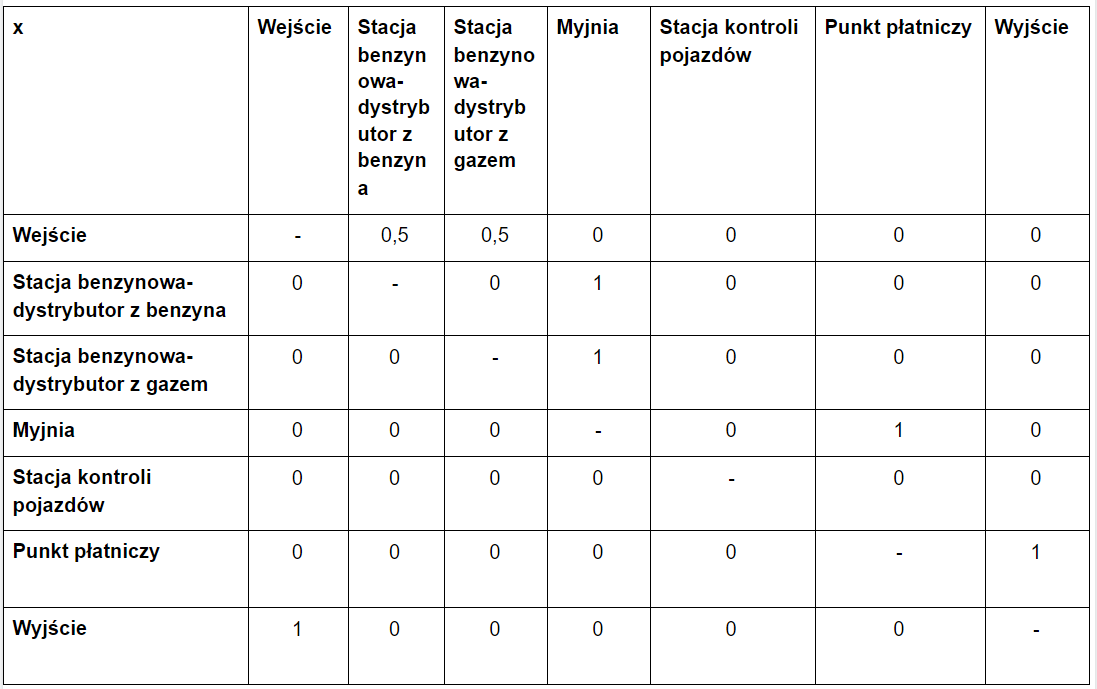

### Klasa 1- tankowanie, mycie
Przebieg: tankowanie benzyna/gazem -> myjnia -> kasa

In [2]:
p1 = np.asarray([
                [0,0.5,0.5,0,0,0], 
                [0,0,0,1,0,0], 
                [0,0,0,1,0,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0]
              ])

### Klasa 2- tankowanie
Przebieg: tankowanie benzyna/gazem -> kasa

In [3]:
p2 = np.asarray([
                [0,0.5,0.5,0,0,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0] 
              ])

### Klasa 3- badania okresowe, tankowanie
Przebieg: badania okresowe pojazdów -> tankowanie benzyna/gazem -> kasa

In [4]:
p3 = np.asarray([
                [0,0,0,0,1,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0], 
                [0,0.5,0.5,0,0,0], 
                [0,0,0,0,0,0] 
              ])

### Klasa 4- badania okresowe
Przebieg: badania okresowe pojazdów -> kasa

In [5]:
p4 = np.asarray([
                [0,0,0,0,1,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,1],
                [0,0,0,0,0,0] 
              ])

### Klasa 5- myjnia
Przebieg: myjnia -> kasa

In [6]:
p5 = np.asarray([
                [0,0,0,1,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,1], 
                [0,0,0,0,0,0],
                [0,0,0,0,0,0]
              ])

### Klasa 6- myjnia, badania okresowe
Przebieg: myjnia -> przegląd -> kasa

In [7]:
p6 = np.asarray([
                [0,0,0,1,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,0,0], 
                [0,0,0,0,1,0], 
                [0,0,0,0,0,1],
                [0,0,0,0,0,0]
              ])


In [8]:
p = [p1, p2, p3, p4, p5, p6]

In [9]:
_lambda = 500

In [10]:
_class_lambdas = [0.1 * _lambda, 0.3 * _lambda, 0.2 * _lambda, 0.1 * _lambda, 0.15 * _lambda, 0.15 * _lambda]

## Przepustowość każdej klasy w każdym systemie 
- r- index klasy, r=1,..,R
- i- index systemu, i=1,..,N
- N- liczba systemow
- R- liczba klas

lambda(0,ir) to jest lambda wejsciowa dla kazdego systemu

In [11]:
def lambda_ir(N, p, i, r):
    sum = _class_lambdas[r] * p[r][0][i+1]
#     print(sum)
    for j in range(N):
#         print("###############")
#         print("p[r][j][i+1] = ", p[r][j][i+1])
#         print("_class_lambdas[r] = ", _class_lambdas[r] )
#         print("p[r][0][j] = ", p[r][0][j])
        sum += p[r][j+1][i+1] * _class_lambdas[r] * p[r][0][j+1]
#         print("###############")
    return sum
    
#     sum = 0
#     for j in range(1, N):
#         for s in range(1, R):
#             sum += _lambda[j][s] * p[s][j][i]

In [12]:
#problem z implementacja/ zrozumieniem wzoru

In [13]:
N = 5
R = len(_class_lambdas)
lambdas_ir = []

for i in range(N):
    lambdas_ir_class = []
    for r in range(R):
        lambdas_ir_class.append(lambda_ir(N, p, i, r))
    lambdas_ir.append(lambdas_ir_class)

print("\t  k1\tk2    k3    k4   k5   k6")
for i in range(len(lambdas_ir)):
    print("system {}".format(i+1), lambdas_ir[i])

	  k1	k2    k3    k4   k5   k6
system 1 [25.0, 75.0, 50.0, 0.0, 0.0, 0.0]
system 2 [25.0, 75.0, 50.0, 0.0, 0.0, 0.0]
system 3 [50.0, 0.0, 0.0, 0.0, 75.0, 75.0]
system 4 [0.0, 0.0, 100.0, 50.0, 0.0, 75.0]
system 5 [0.0, 150.0, 0.0, 50.0, 75.0, 0.0]


### Względna intensywność obsługi każdej klasy w każdym systemie

In [53]:
m = [20,30,40,20,20]
mu = [[1 for r in range(R)] for i in range(N)]
ro_ir = []
for i in range(N):
    ro_class = []
    for r in range(R):
        ro_class.append(lambdas_ir[i][r] / (m[i] * mu[i][r]))
    ro_ir.append(ro_class)
    
ro_ir

[[1.25, 3.75, 2.5, 0.0, 0.0, 0.0],
 [0.8333333333333334, 2.5, 1.6666666666666667, 0.0, 0.0, 0.0],
 [1.25, 0.0, 0.0, 0.0, 1.875, 1.875],
 [0.0, 0.0, 5.0, 2.5, 0.0, 3.75],
 [0.0, 7.5, 0.0, 2.5, 3.75, 0.0]]

In [15]:
def warunek_ergodycznosci(ro_ir):
    #sprawdzaj warunku ergodycznosci
    erg_met = True
    for el in ro_ir:
        if not all(ele < 1 for ele in el):
            print("Warunek ergodycznosci nie jest spelniony")
            erg_met = False
            break
    if erg_met:
        print("Warunek ergodycznosci jest spelniony")
    return erg_met

In [16]:
warunek_ergodycznosci(ro_ir)

Warunek ergodycznosci nie jest spelniony


False

## Implementacja algorytmu rekurencyjnego

In [17]:
numOfClasses = 6
numOfSystems= 5

In [18]:
# countSys(0, 2, printData = True) #Przyklad dzialania

In [19]:
def countSys(sysNum, classNum, printData = False):
    if(printData):
        print("System: ", sysNum, "        Klasa: ", classNum )
    sum = 0;
    sum += _class_lambdas[classNum] * p[classNum][0][sysNum + 1];
    
    if(printData):
        print("Suma poczatkowa: ", sum)
    isColEmpty = True
    for i in range(1 , numOfSystems + 1):
        if(p[classNum][i][sysNum + 1] != 0):
            isColEmpty = False
            break
    
    if(printData):
        print("Czy zgloszenia przychodza z innych systemow: ", not isColEmpty, end = "\n\n")
        
    if(not isColEmpty):
        for i in range(1, numOfSystems + 1):
            if(p[classNum][i][sysNum + 1] != 0):
                sum += countSys(i-1, classNum, True if printData else False) * p[classNum][i][sysNum + 1]
    if(printData and (not isColEmpty)):
        print("Ilosc zgloszen z innych systemow: ", sum - _class_lambdas[classNum] * p[classNum][0][sysNum + 1])
                
    return sum;

In [51]:
#Uzupelnienie lambd ir

lam = [[0 for col in range(6)] for row in range(5)]

for classNum in range(0, numOfClasses):
    for sysNum in range(0, numOfSystems):
        lam[sysNum][classNum] = countSys(sysNum, classNum)

for i in lam:
    print(i)

[25.0, 75.0, 50.0, 0.0, 0.0, 0.0]
[25.0, 75.0, 50.0, 0.0, 0.0, 0.0]
[50.0, 0.0, 0.0, 0.0, 75.0, 75.0]
[0.0, 0.0, 100.0, 50.0, 0.0, 75.0]
[50.0, 150.0, 100.0, 50.0, 75.0, 75.0]


In [77]:
mu = [[(i+1)*20 for r in range(R)] for i in range(N)]
for i in mu:
    print(i)
# dopisz funckje obliczajaca tablice ro_ir dla danego m, lam oraz mu
ro_ir = []
for i in range(N):
    ro_class = []
    for r in range(R):
        ro_class.append(lam[i][r] / (m[i] * mu[i][r]))
    ro_ir.append(ro_class)
print()
for i in ro_ir:
    print('[', end='')
    for j in i:
        print("{:.2f}".format(j), end=', ')
    print(']')

[20, 20, 20, 20, 20, 20]
[40, 40, 40, 40, 40, 40]
[60, 60, 60, 60, 60, 60]
[80, 80, 80, 80, 80, 80]
[100, 100, 100, 100, 100, 100]

[0.06, 0.19, 0.12, 0.00, 0.00, 0.00, ]
[0.02, 0.06, 0.04, 0.00, 0.00, 0.00, ]
[0.02, 0.00, 0.00, 0.00, 0.03, 0.03, ]
[0.00, 0.00, 0.06, 0.03, 0.00, 0.05, ]
[0.03, 0.07, 0.05, 0.03, 0.04, 0.04, ]


In [78]:
warunek_ergodycznosci(ro_ir)

Warunek ergodycznosci jest spelniony


True

# Wyznaczyć prawdopodobieństwa stanów sieci

In [79]:
def pi_k_i(ro_i, k_i, m_i):
    if m_i == 1:
        return (1 - ro_i)*ro_i**k_i
    else:
        sum_ = 0
        for i in range(m_i):
            sum_ += (m_i*ro_i)**i/np.math.factorial(i)
        sum_ += (m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
        if k_i <= m_i:
            return 1/sum_*(m_i*ro_i)**k_i/np.math.factorial(k_i)
        else:
            return 1/sum_*m_i**m_i*ro_i**k_i/np.math.factorial(m_i)

In [80]:
def ro_i(i):
    return np.sum(ro_ir[i])

In [81]:
probabilities = []
for i in range(N):
    probabilities_i = []
    for k in range(10):
        probabilities_i.append(pi_k_i(ro_i(i), k, m[i]))
    probabilities.append(probabilities_i)
probabilities

[[0.0005530818264950953,
  0.004148113698713215,
  0.015555426370174557,
  0.03888856592543639,
  0.07291606111019323,
  0.10937409166528984,
  0.1367176145816123,
  0.14648315848029891,
  0.13732796107528022,
  0.11443996756273352],
 [0.023517745856009097,
  0.08819154696003412,
  0.16535915055006395,
  0.20669893818757992,
  0.1937802545508562,
  0.14533519091314215,
  0.09083449432071385,
  0.04866133624323956,
  0.022810001364018544,
  0.009504167235007726],
 [0.03567399334725242,
  0.11891331115750807,
  0.1981888519291801,
  0.2202098354768667,
  0.18350819623072226,
  0.12233879748714817,
  0.0679659986039712,
  0.03236476123998628,
  0.013485317183327617,
  0.004994561919750969],
 [0.06005466789529341,
  0.1689037534555127,
  0.23752090329681474,
  0.22267584684076383,
  0.15656895480991206,
  0.08807003708057554,
  0.04128282988151978,
  0.016586851291682053,
  0.0058313149072319725,
  0.0018222859085099913],
 [0.006737946952271192,
  0.03368973476135596,
  0.0842243369033899,

# Wyznaczyć średnie liczby zgłoszeń klasy „r” w każdym systemie „i”

In [82]:
import math
def K_ir(ro_ir, ro_i, m_i):
    sum_ = 0
    for k_i in range(m_i):
        sum_ += (m_i*ro_i)**k_i/np.math.factorial(k_i)
    sum_ += (m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
    result = m_i*ro_ir + ro_ir/(1 - ro_i)*(m_i*ro_i)**m_i/(np.math.factorial(m_i)*(1 - ro_i))
    result *= 1/sum_
    return result

In [101]:
def calculate_K(N, R, ro_ir, ro_i, m):
    k_ir_list = []
    for i in range(N):
        r_list = []
        for r in range(R):
            r_list.append(K_ir(ro_ir[i][r], ro_i(i), m[i]))
        k_ir_list.append(r_list)
    for i in k_ir_list:
        print('[', end='')
        for j in i:
            print("{:.2f}".format(j), end=', ')
        print(']')

In [102]:
calculate_K(N, R, ro_ir, ro_i, m)

[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ]
[0.01, 0.04, 0.03, 0.00, 0.00, 0.00, ]
[0.03, 0.00, 0.00, 0.00, 0.04, 0.04, ]
[0.00, 0.00, 0.08, 0.04, 0.00, 0.06, ]
[0.00, 0.01, 0.01, 0.00, 0.01, 0.01, ]


# Optymalizacja

In [88]:
def Q_ir(ro_ir, ro_i, m_i):
    q_ir = m_i * ro_ir
    denominator = 0
    for k_i in range(m_i - 1):
        denominator += ((m_i * ro_i) ** k_i) / math.factorial(k_i)
    denominator += ( ((m_i * ro_i) ** m_i) / math.factorial(m_i) ) * 1 / (1 - ro_i)
    q_ir += (ro_ir / (1 - ro_i)) * (((m_i * ro_i) ** m_i) / (math.factorial(m_i) * (1 - ro_i))) * (1 / denominator)
    return q_ir

In [103]:
def calculate_Q(N, R, ro_ir, ro_i, m):
    Q_ir_list = []
    for i in range(N):
        r_list = []
        for r in range(R):
            r_list.append(Q_ir(ro_ir[i][r], ro_i(i), m[i]))
        Q_ir_list.append(r_list)
    for i in Q_ir_list:
        print('[', end='')
        for j in i:
            print("{:.2f}".format(j), end=', ')
        print(']')

In [104]:
calculate_Q(N, R, ro_ir, ro_i, m)

[1.25, 3.75, 2.50, 0.00, 0.00, 0.00, ]
[0.62, 1.88, 1.25, 0.00, 0.00, 0.00, ]
[0.83, 0.00, 0.00, 0.00, 1.25, 1.25, ]
[0.00, 0.00, 1.25, 0.63, 0.00, 0.94, ]
[0.50, 1.50, 1.00, 0.50, 0.75, 0.75, ]


In [91]:
C1 = np.asarray([
                [0.1,0.3,0.2,0,0,0], 
                [0.1,0.3,0.2,0,0,0], 
                [0.2,0,0,0,0.3,0.3], 
                [0,0,0.4,0.2,0,0.3], 
                [0.2,0.6,0.4,0.2,0.3,0.3]
              ])
C2 = np.asarray([0.1,0.2,0.3,0.4,0.5])

In [92]:
def f_c(lambda_list, m, mu, N, R):
    for i in range(N):
        _sum = 0
        for j in range(R):
            _sum += C1[i][j] * Q_ir(ro_ir[i][j], ro_i(i), m[i])
        m_nzi = m[i] - ro_i(i)  
        _sum += C2[i] * m_nzi
    return _sum

In [93]:
f_c(lam, m, mu, N, R)

11.825000045781035

#### Poszukiwanie optymalnej liczby kanałów obsługi w systemie M/M/m/FIFO/inf

In [94]:
from geneticalgorithm import geneticalgorithm as ga
def f_c(m):
    for i in range(N):
        _sum = 0
        for j in range(R):
            _sum += C1[i][j] * Q_ir(ro_ir[i][j], ro_i(i), int(m[i]))
        m_nzi = m[i] - ro_i(i)  
        _sum += C2[i] * m_nzi
    return _sum

In [95]:
f_c(m)

11.825000045781035

In [96]:
varbound = np.array([[1, 100], [1, 100], [1, 100], [1, 100], [1, 100], [1, 100]])

### Porównanie wyników działania algorytmu genetycznego dla różnych wartości:
- prawdopodobieństwa mutacji
- prawdopodobieństwa krzyżowania
- liczby osobników, które niezmienione przechodzą do następnej iteracji

In [36]:
mp = [0.1, 0.2, 0.3] # mutation probability
cp = [0.4, 0.5, 0.6] # crossover probability
pp = [0, 0.1, 0.2] # parents portion

Mutation probability = 0.1, crossover probability = 0.4, parents portion = 0
 The best solution found:                                                                           
 [42. 34. 55. 73.  5. 68.]

 Objective function:
 2.863800062402995


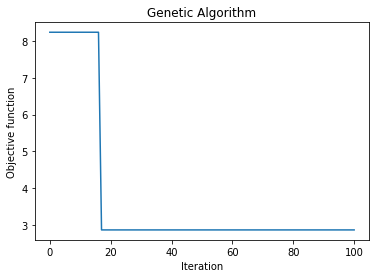

Mutation probability = 0.1, crossover probability = 0.4, parents portion = 0.1
 The best solution found:                                                                           
 [79. 96. 31. 89.  2. 29.]

 Objective function:
 1.0885714285714285


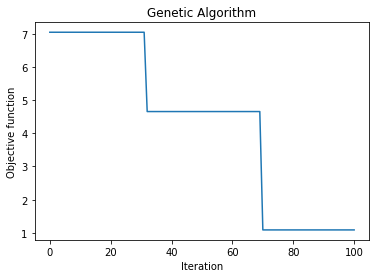

Mutation probability = 0.1, crossover probability = 0.4, parents portion = 0.2
 The best solution found:                                                                           
 [55. 21. 80. 93.  1. 94.]

 Objective function:
 0.6025


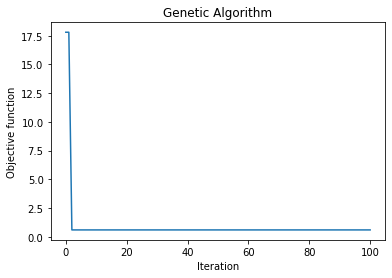

Mutation probability = 0.1, crossover probability = 0.5, parents portion = 0
 The best solution found:                                                                           
 [48. 70. 38. 25.  1. 64.]

 Objective function:
 0.6025


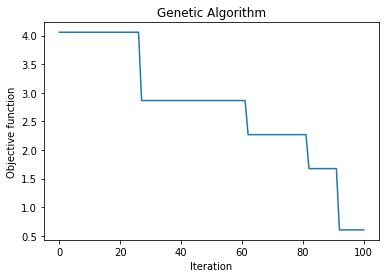

Mutation probability = 0.1, crossover probability = 0.5, parents portion = 0.1
 The best solution found:                                                                           
 [33. 74. 37. 66.  1. 35.]

 Objective function:
 0.6025


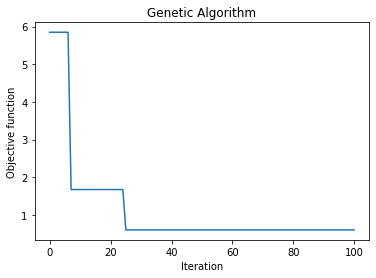

Mutation probability = 0.1, crossover probability = 0.5, parents portion = 0.2
 The best solution found:                                                                           
 [92. 72. 68. 47.  1. 71.]

 Objective function:
 0.6025


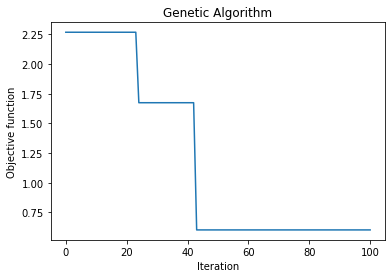

Mutation probability = 0.1, crossover probability = 0.6, parents portion = 0
 The best solution found:                                                                           
 [26. 21. 73.  8.  2. 47.]

 Objective function:
 1.0885714285714285


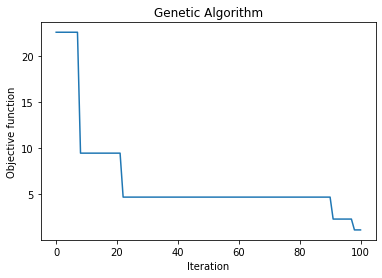

Mutation probability = 0.1, crossover probability = 0.6, parents portion = 0.1
 The best solution found:                                                                           
 [21. 50. 32. 65.  1. 27.]

 Objective function:
 0.6025


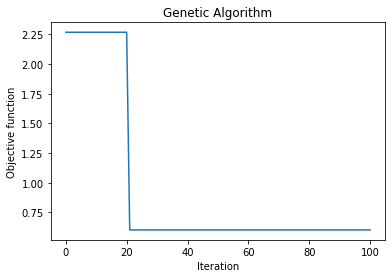

Mutation probability = 0.1, crossover probability = 0.6, parents portion = 0.2
 The best solution found:                                                                           
 [29. 32. 18. 13.  2. 56.]

 Objective function:
 1.0885714285714285


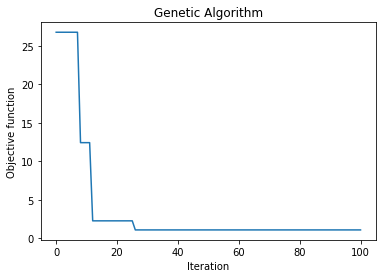

Mutation probability = 0.2, crossover probability = 0.4, parents portion = 0
 The best solution found:                                                                           
 [41. 18. 33. 50.  1.  3.]

 Objective function:
 0.6025


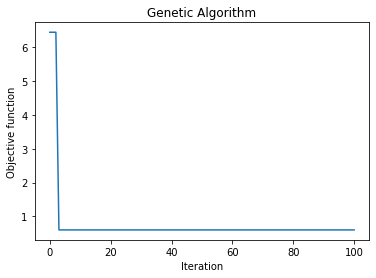

Mutation probability = 0.2, crossover probability = 0.4, parents portion = 0.1
 The best solution found:                                                                           
 [11. 90. 87. 75.  1. 97.]

 Objective function:
 0.6025


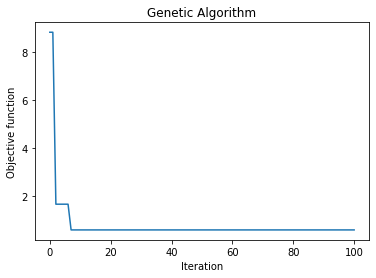

Mutation probability = 0.2, crossover probability = 0.4, parents portion = 0.2
 The best solution found:                                                                           
 [70. 67. 61.  7.  1. 39.]

 Objective function:
 0.6025


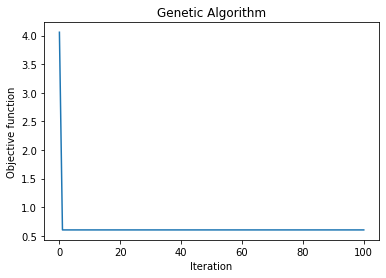

Mutation probability = 0.2, crossover probability = 0.5, parents portion = 0
 The best solution found:                                                                           
 [ 8. 95. 97. 64.  1. 33.]

 Objective function:
 0.6025


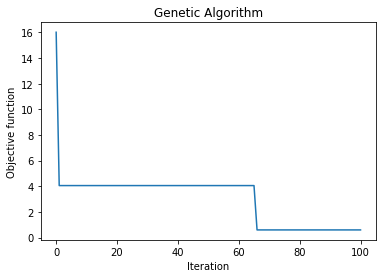

Mutation probability = 0.2, crossover probability = 0.5, parents portion = 0.1
 The best solution found:                                                                           
 [23. 21. 83. 27.  1. 37.]

 Objective function:
 0.6025


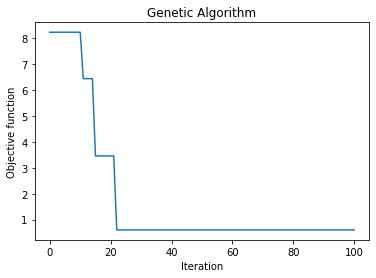

Mutation probability = 0.2, crossover probability = 0.5, parents portion = 0.2
 The best solution found:                                                                           
 [37.  4. 18. 98.  1. 90.]

 Objective function:
 0.6025


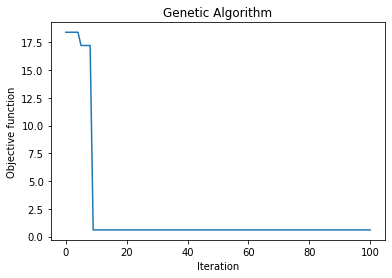

Mutation probability = 0.2, crossover probability = 0.6, parents portion = 0
 The best solution found:                                                                           
 [11. 25. 47. 59.  3. 76.]

 Objective function:
 1.6741101694915255


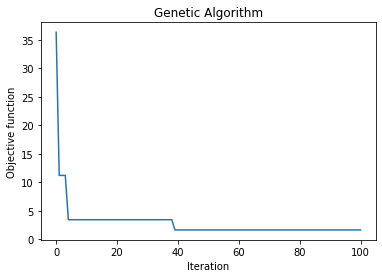

Mutation probability = 0.2, crossover probability = 0.6, parents portion = 0.1
 The best solution found:                                                                           
 [ 8. 26. 30. 87.  2. 85.]

 Objective function:
 1.0885714285714285


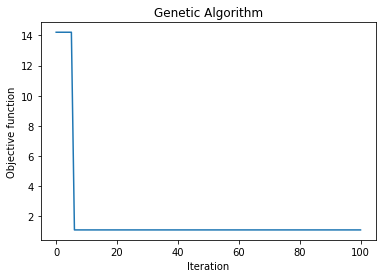

Mutation probability = 0.2, crossover probability = 0.6, parents portion = 0.2
 The best solution found:                                                                           
 [64.  4. 26. 45.  1. 94.]

 Objective function:
 0.6025


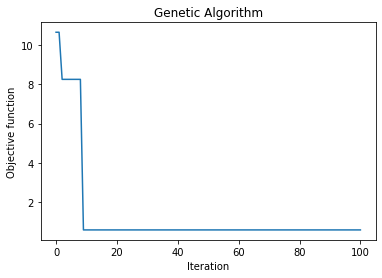

Mutation probability = 0.3, crossover probability = 0.4, parents portion = 0
 The best solution found:                                                                           
 [17. 98. 20. 14.  1. 86.]

 Objective function:
 0.6025


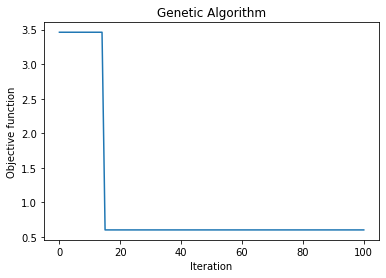

Mutation probability = 0.3, crossover probability = 0.4, parents portion = 0.1
 The best solution found:                                                                           
 [13. 32. 98. 84.  1. 48.]

 Objective function:
 0.6025


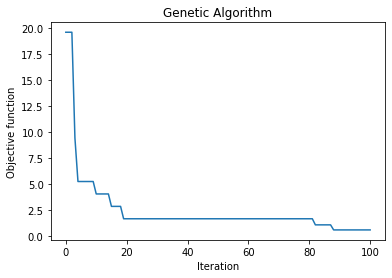

Mutation probability = 0.3, crossover probability = 0.4, parents portion = 0.2
 The best solution found:                                                                           
 [64.  8. 19. 10.  1. 89.]

 Objective function:
 0.6025


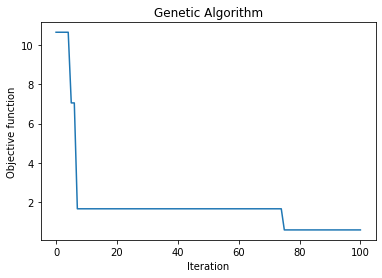

Mutation probability = 0.3, crossover probability = 0.5, parents portion = 0
 The best solution found:                                                                           
 [44. 81. 33. 24.  1. 23.]

 Objective function:
 0.6025


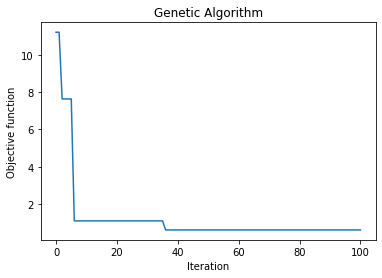

Mutation probability = 0.3, crossover probability = 0.5, parents portion = 0.1
 The best solution found:                                                                           
 [19. 47.  6. 82.  2. 19.]

 Objective function:
 1.0885714285714285


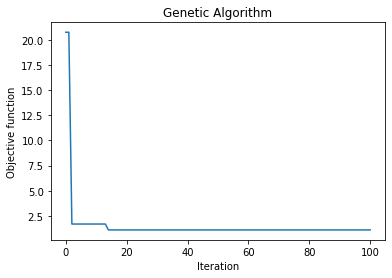

Mutation probability = 0.3, crossover probability = 0.5, parents portion = 0.2
 The best solution found:                                                                           
 [33. 12. 92. 41.  1. 11.]

 Objective function:
 0.6025


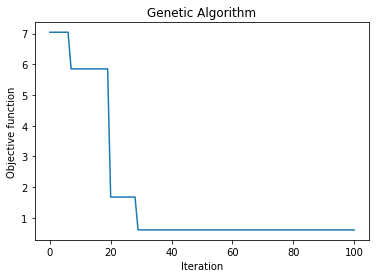

Mutation probability = 0.3, crossover probability = 0.6, parents portion = 0
 The best solution found:                                                                           
 [ 3. 74. 89. 14.  1. 41.]

 Objective function:
 0.6025


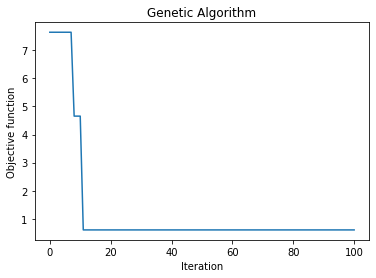

Mutation probability = 0.3, crossover probability = 0.6, parents portion = 0.1
 The best solution found:                                                                           
 [77. 92. 46. 95.  1. 91.]

 Objective function:
 0.6025


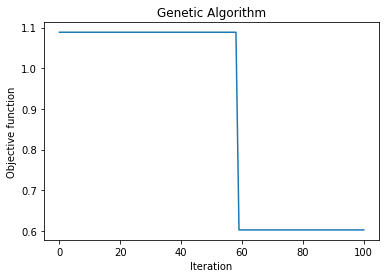

Mutation probability = 0.3, crossover probability = 0.6, parents portion = 0.2
 The best solution found:                                                                           
 [60. 11. 29. 93.  1. 84.]

 Objective function:
 0.6025


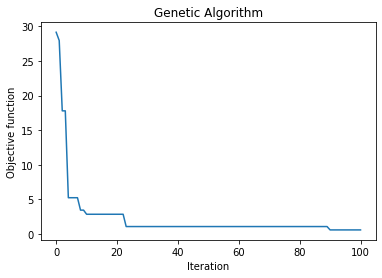

In [37]:
best_solution = {'mp': 0, 'cp': 0, 'pp': 0, 'cf': -1, 'ii': -1, 'sol': []} #cf- cost function, ii-iteration index, sol-solution
for _mp in mp:
    for _cp in cp:
        for _pp in pp:
            algorithm_param = {'max_num_iteration': 100,\
                   'population_size':5,\
                   'mutation_probability':_mp,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': _cp,\
                   'parents_portion': _pp,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
            model = ga(function=f_c, dimension=6, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
            print("Mutation probability = {}, crossover probability = {}, parents portion = {}".format(_mp, _cp, _pp))
            model.run()
            index_min = min(range(len(model.report)), key=model.report.__getitem__)
            if best_solution['cf'] == -1:
                best_solution['cf'] = model.output_dict['function']
                best_solution['mp'] = _mp
                best_solution['cp'] = _cp
                best_solution['pp'] = _pp
                best_solution['ii'] = index_min
                best_solution['sol'] = list(model.output_dict['variable'])
            else:
                if model.output_dict['function'] < best_solution['cf']:
                    best_solution['cf'] = model.output_dict['function']
                    best_solution['mp'] = _mp
                    best_solution['cp'] = _cp
                    best_solution['pp'] = _pp
                    best_solution['ii'] = index_min
                    best_solution['sol'] = list(model.output_dict['variable'])
                

### Best found solution

In [107]:
best_solution['sol'] = [int(_) for _ in best_solution['sol']]
print("Best found solution: {}".format(best_solution['sol']))
print("Cost function value: {}".format(best_solution['cf']))
print("Mutation probability: {}".format(best_solution['mp']))
print("Crossover probability: {}".format(best_solution['cp']))
print("Parents portion: {}".format(best_solution['pp']))
print("At iteration: {}".format(best_solution['ii']))

Best found solution: [55, 21, 80, 93, 1, 94]
Cost function value: 0.6025
Mutation probability: 0.1
Crossover probability: 0.4
Parents portion: 0.2
At iteration: 2


In [108]:
calculate_K(N, R, ro_ir, ro_i, best_solution['sol'])

[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ]
[0.03, 0.10, 0.06, 0.00, 0.00, 0.00, ]
[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ]
[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, ]
[0.03, 0.08, 0.05, 0.03, 0.04, 0.04, ]


In [109]:
calculate_Q(N, R, ro_ir, ro_i, best_solution['sol'])

[3.44, 10.31, 6.88, 0.00, 0.00, 0.00, ]
[0.44, 1.31, 0.88, 0.00, 0.00, 0.00, ]
[1.67, 0.00, 0.00, 0.00, 2.50, 2.50, ]
[0.00, 0.00, 5.81, 2.91, 0.00, 4.36, ]
[0.06, 0.17, 0.12, 0.06, 0.09, 0.09, ]
